# PyTorch

## Импорт библиотек

In [2]:
# Основные библиотеки
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms # по возможности отказаться в пользу v2
from torchvision.transforms import v2


In [3]:
# Вспомогательные библиотеки

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# для загрузки изображений
from PIL import Image 

# для отображения прогресс-бар при работе с циклами
from tqdm import tqdm

In [4]:
# Библиотеки для загрузки данных

import struct
import sys

from array import array
from os import path

In [5]:
# выбор процессора

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Тензор

### Создание Тензора

In [3]:
torch.tensor([2,3]) 

tensor([2, 3])

In [3]:
# тензор двумерного массива с объявлением типа данных
torch.tensor([[2,3], [4,5]], dtype=torch.int32)

tensor([[2, 3],
        [4, 5]], dtype=torch.int32)

In [4]:
# тензор двумерного массива с объявлением типа данных FLOAT (важно, если requires_grad=True)
# requires_grad=True - для этого тензора будут вычисляться градиенты во всех функциях, где он будет участвовать
torch.tensor([[2,3], [4,5]], dtype=torch.float32, requires_grad=True)

tensor([[2., 3.],
        [4., 5.]], requires_grad=True)

In [7]:
# создание и перемещение тензора на графический процессор
torch.tensor([[2,3],[4,5]], device=torch.device('cuda:0'))

tensor([[2, 3],
        [4, 5]], device='cuda:0')


### Основные свойства и методы Тензора

In [26]:
tensor = torch.tensor([[[2,3], [4,5]], [[6,7], [8,9]]], dtype=torch.float32, requires_grad=True)

In [27]:
tensor

tensor([[[2., 3.],
         [4., 5.]],

        [[6., 7.],
         [8., 9.]]], requires_grad=True)

In [32]:
#тип переменных

tensor.dtype

torch.float32

In [33]:
# размер тензора

print(tensor.shape)
print(tensor.size())

torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


In [34]:
# количество осей в тензоре

tensor.ndim

3

In [35]:
# обращение к элементу тензора (это тоже не число, а тензор)

tensor[0,0,0]

tensor(2., grad_fn=<SelectBackward0>)

In [36]:
type(tensor[0,0,0])

torch.Tensor

In [37]:
#получение непосредственно числа (из элемента тензора)

tensor[0,0,0].item()

2.0

In [38]:
type(tensor[0,0,0].item())

float

### Создание Тензоров разного размера

In [40]:
#матрица со всеми нулями заданной размерности

tensor = torch.zeros([2,3,2])
tensor

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [42]:
#матрица со всеми единицами заданной размерности

tensor = torch.ones([2,3,2], dtype=torch.int32)
tensor

tensor([[[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]]], dtype=torch.int32)

In [44]:
#матрица со всеми нулями и размерностью аналогично той матрице, что предана в метод

tensor = torch.zeros_like(tensor)
tensor

tensor([[[0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0]]], dtype=torch.int32)

In [47]:
# матрица размерностью аналогично той, что предана в метод, но заполнена переданным элементом

tensor = torch.full_like(tensor, 7)
tensor

tensor([[[7, 7],
         [7, 7],
         [7, 7]],

        [[7, 7],
         [7, 7],
         [7, 7]]], dtype=torch.int32)

In [49]:
#тензор со значениями заданного диапазона и с указанным шагом

torch.arange(2, 10, 0.5)

tensor([2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000, 6.0000,
        6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])

In [55]:
# диагональная матрица

torch.diag(torch.tensor([3,2]))

tensor([[3, 0],
        [0, 2]])

In [56]:
# единичная матрица

torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [60]:
# нижняя треугольная матрица

torch.tril(torch.tensor([[1,2,3],[2,3,4],[3,4,5]]))

tensor([[1, 0, 0],
        [2, 3, 0],
        [3, 4, 5]])

### Изменение размера, создание дополнительных осей

In [77]:
tensor = torch.tensor([1,2,3,4])
tensor

tensor([1, 2, 3, 4])

In [78]:
# Изменение размера тензора

tensor_1 = tensor.view([4,1])
tensor_2 = tensor.reshape([2,2])

print(tensor_1, '\n\n', tensor_2)

tensor([[1],
        [2],
        [3],
        [4]]) 

 tensor([[1, 2],
        [3, 4]])


In [79]:
# Добавление осей

print(tensor, tensor.shape) # до добавления оси

tensor = torch.unsqueeze(tensor, 0) # добавление оси

print(tensor, tensor.shape) # после добавления оси

tensor([1, 2, 3, 4]) torch.Size([4])
tensor([[1, 2, 3, 4]]) torch.Size([1, 4])


### Арифметические операции и мат. функции

In [82]:
# Арифметические операции

tensor = torch.tensor([1,2,3,4,5])

tensor_prod = tensor * 5
tensor_sum = tensor + torch.tensor([1,2,3,4,5])

#!!!! ТАК ДЕЛАТЬ НЕЛЬЗЯ - ТЕНЗОР СО СПИСКОМ НЕ СКЛАДЫВАЮТ. !!!!#
#          tensor_sum = tensor + [1,2,3,4,5]

print(tensor_prod, tensor_sum, sep='\n\n')

tensor([ 5, 10, 15, 20, 25])

tensor([ 2,  4,  6,  8, 10])


In [84]:
# Математические функции

tensor = torch.tensor([1,2,3,4,5,6], dtype = torch.float32)

print('Sum: ', tensor.sum())
print('Mean: ', tensor.mean())

Sum:  tensor(21.)
Mean:  tensor(3.5000)


In [168]:
# Математические функции по осям тензора

tensor = torch.tensor([1,2,3,4,5,6], dtype = torch.float32)
tensor = tensor.view([2,3]) #изменим размерность тензора, чтобы было видно, что измерение происходит по осям

tensor_mean = tensor.mean(dim=1,
                          #keepdim=True
                         )

#keepdim=True - ось, по котрой считается среднее значение НЕ УДАЛЯЕТСЯ
tensor_mean_keepdim = tensor.mean(dim=1,
                          keepdim=True
                         )

print('Transformed Tensor: \n', f'\033[94m{tensor}\033[0m', '\n')
print('Tensor with means by axes:', f'\033[94m{tensor_mean}\033[0m', '\n')
print('Shape of tensor with means by axes: ', f'\033[94m{tensor_mean.shape}\033[0m', '\n')
print('\033[91mWith keepdim:\033[0m')
print('Tensor with means by axes:\n', f'\033[94m{tensor_mean_keepdim}\033[0m', '\n')
print('Shape of tensor with means by axes: ', f'\033[94m{tensor_mean_keepdim.shape}\033[0m', '\n')

Transformed Tensor: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

Tensor with means by axes: tensor([2., 5.]) 

Shape of tensor with means by axes:  torch.Size([2]) 

With keepdim:
Tensor with means by axes:
 tensor([[2.],
        [5.]]) 

Shape of tensor with means by axes:  torch.Size([2, 1]) 



### Перевод Тензора на GPU или CPU

In [6]:
#доступность центрального процессора
print(torch.cpu.is_available())

#доступность графического процессора
print(torch.cuda.is_available())

True
True


##### По умолчанию все тензоры создаются на CPU

In [154]:
tensor = torch.tensor([1.,2.,3.], requires_grad=True) 
# requires_grad=True - PyTorch запоминает всё, что с происходит с тензором, чтобы потом автоматически рассчитать производные (градиенты)

In [157]:
#Способы перевести тензор на CPU (переносится копия)

tensor_1 = tensor.cpu()
print(tensor_1)
tensor_2 = tensor.to('cpu')
print(tensor_2)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


In [159]:
#Способы перевести тензор на GPU (переносится копия)

tensor_3 = tensor.cuda()
print(tensor_3)
tensor_4 = tensor.to('cuda')
print(tensor_4)

tensor([1., 2., 3.], device='cuda:0', grad_fn=<ToCopyBackward0>)
tensor([1., 2., 3.], device='cuda:0', grad_fn=<ToCopyBackward0>)


##### Безопасный способ перевода тензора на GPU

In [161]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor = tensor.to(device)
tensor.device

device(type='cuda', index=0)

<div class="alert alert-block alert-danger"> Нельзя делать совместные операции, если один тензор на GPU, а другой на CPU  </div>

##### Перенос тензора на CPU

In [165]:
new_tensor_1 = tensor_3.cpu()
new_tensor_1

tensor([1., 2., 3.], grad_fn=<ToCopyBackward0>)

##### Перенос тензора на CPU c откреплением графа вычислений градиента этого тензора

In [167]:
new_tensor_2 = tensor_3.cpu().detach()
new_tensor_2

tensor([1., 2., 3.])

## Преобразования изображений

### Загрузка и основные параметры изображения

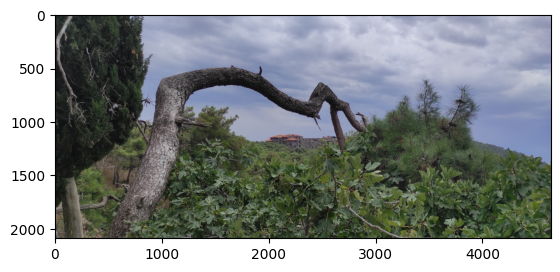

In [17]:
plt.imshow(Image.open('ds\\old_house.jpg'))

In [51]:
img = np.array(Image.open('ds\\old_house.jpg'))
print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'numpy.ndarray'>
(2088, 4640, 3)
uint8
min = 0, max = 242


**Отображение картинки по разным цветовым каналам**

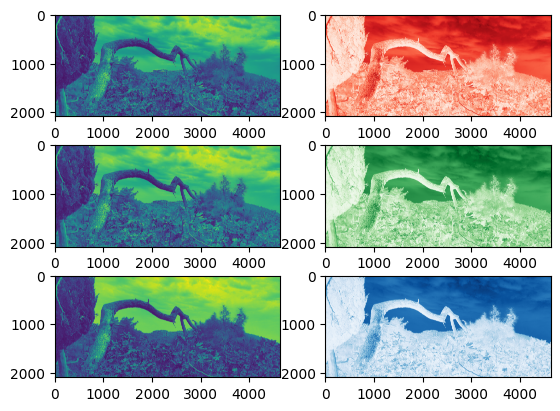

In [52]:
# по умолчанию и с разбивкой по цветам
_, ax = plt.subplots(3,2)

ax[0][0].imshow(img[..., 0])
ax[0][1].imshow(img[..., 0], cmap='Reds')
ax[1][0].imshow(img[..., 1])
ax[1][1].imshow(img[..., 1], cmap='Greens')
ax[2][0].imshow(img[..., 2])
ax[2][1].imshow(img[..., 2], cmap='Blues')

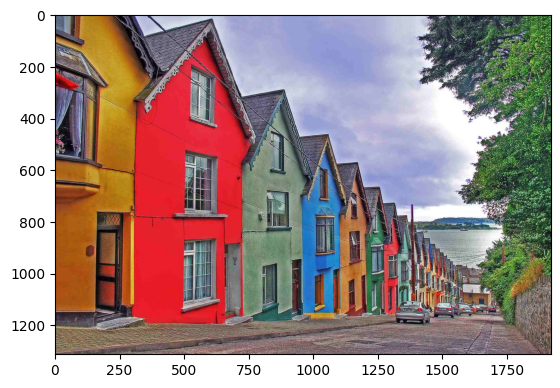

In [53]:
# Картинка с более обширным разбросом цветовой гаммы
plt.imshow(Image.open('ds\\colored_houses.jpg'))

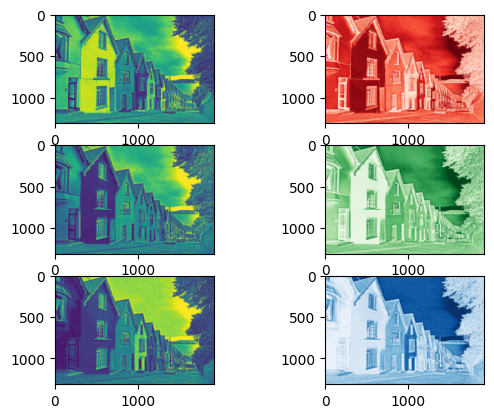

In [54]:
# Картинка с более обширным разбросом цветовой гаммы
img_colored = np.array(Image.open('ds\\colored_houses.jpg'))

_, ax = plt.subplots(3,2)

ax[0][0].imshow(img_colored[..., 0])
ax[0][1].imshow(img_colored[..., 0], cmap='Reds')
ax[1][0].imshow(img_colored[..., 1])
ax[1][1].imshow(img_colored[..., 1], cmap='Greens')
ax[2][0].imshow(img_colored[..., 2])
ax[2][1].imshow(img_colored[..., 2], cmap='Blues')

### Преобразования при помощи transforms

In [55]:
# Перевод в тензор для дальнейшей работы с torch

transform = transforms.ToTensor()
img_ToTensor = transform(img) #можно передавать PIL или numpy

print(type(img_ToTensor))
print(img_ToTensor.shape)
print(img_ToTensor.dtype)
print(f'min = {img_ToTensor.min()}, max = {img_ToTensor.max()}')

<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = 0.0, max = 0.9490196108818054


In [56]:
# Нормализация данных

transform = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_norm = transform(img_ToTensor) # нужно передавать тензор

print(type(img_norm))
print(img_norm.shape)
print(img_norm.dtype)
print(f'min = {img_norm.min()}, max = {img_norm.max()}')

<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980392217636108


In [59]:
# Объединение трансформаций

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(Image.open('ds\\old_house.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980392217636108


### Преобразования при помощи V2

In [62]:
# Перевод в тензор для дальнейшей работы с torch

transform = v2.ToTensor()
img_ToTensor_v2 = transform(Image.open('ds\\old_house.jpg')) #можно передавать PIL или numpy

print(type(img_ToTensor_v2))
print(img_ToTensor_v2.shape)
print(img_ToTensor_v2.dtype)
print(f'min = {img_ToTensor_v2.min()}, max = {img_ToTensor_v2.max()}')

<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = 0.0, max = 0.9490196108818054


In [63]:
# Перевод в тензор для дальнейшей работы с torch - новая ф-ция

transform = v2.ToImage()
img_v2 = transform(Image.open('ds\\old_house.jpg')) #можно передавать PIL или numpy

print(type(img_v2))
print(img_v2.shape)
print(img_v2.dtype)
print(f'min = {img_v2.min()}, max = {img_v2.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 2088, 4640])
torch.uint8
min = 0, max = 242


In [65]:
# Изменение типа данных в V2

transform = v2.ToDtype(torch.float32, scale=True) # от scale зависит интервал значений от min до max (0..255 | 0..1)
img_dtype_v2 = transform(img_v2)

print(type(img_dtype_v2))
print(img_dtype_v2.shape)
print(img_dtype_v2.dtype)
print(f'min = {img_dtype_v2.min()}, max = {img_dtype_v2.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 2088, 4640])
torch.float32
min = 0.0, max = 0.9490196704864502


In [68]:
# Нормализация данных

transform = v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
img_norm_v2 = transform(img_dtype_v2) # нужно передавать тензор

print(type(img_norm_v2))
print(img_norm_v2.shape)
print(img_norm_v2.dtype)
print(f'min = {img_norm_v2.min()}, max = {img_norm_v2.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980393409729004


In [70]:
# Объединение трансформаций

transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(Image.open('ds\\old_house.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f'min = {img.min()}, max = {img.max()}')

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980393409729004


## Создание собственного класса преобразований

In [ ]:
# общий пример
class MyTransform(torch.nn.Module):

    def forward(self, sample):
        pass

In [23]:
# собственная реализация класса Normalize с наследованием от torch.nn.Module
class MyNormalize_1(torch.nn.Module):

    def __init__(self, mean, std):
        super().__init__()
        self.mean  = mean
        self.std = std

    def forward(self, sample):
        sample = (sample - self.mean)/self.std

        return sample

In [24]:
# собственная реализация класса Normalize без наследования
class MyNormalize_2():

    def __init__(self, mean, std):
        self.mean  = mean
        self.std = std

    def __call__(self, sample):
        sample = (sample - self.mean)/self.std

        return sample

In [27]:
transform_0 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5), std=(0.5))
    ]
)

transform_1 = transforms.Compose(
    [
        transforms.ToTensor(),
        MyNormalize_1(mean=(0.5), std=(0.5))
    ]
)

transform_2 = transforms.Compose(
    [
        transforms.ToTensor(),
        MyNormalize_2(mean=(0.5), std=(0.5))
    ]
)

In [28]:
exmpl_img = Image.open('ds\\old_house.jpg')

In [31]:
img_0 = transform_0(exmpl_img)
img_1 = transform_1(exmpl_img)
img_2 = transform_2(exmpl_img)

print(f'\033[94mimg_0:\033[0m')
print(type(img_0))
print(img_0.shape)
print(img_0.dtype)
print(f'min = {img_0.min()}, max = {img_0.max()}')

print(f'\033[94m\nimg_1:\033[0m')
print(type(img_1))
print(img_1.shape)
print(img_1.dtype)
print(f'min = {img_1.min()}, max = {img_1.max()}')

print(f'\033[94m\nimg_2:\033[0m')
print(type(img_2))
print(img_2.shape)
print(img_2.dtype)
print(f'min = {img_2.min()}, max = {img_2.max()}')

img_0:
<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980392217636108

img_1:
<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980392217636108

img_2:
<class 'torch.Tensor'>
torch.Size([3, 2088, 4640])
torch.float32
min = -1.0, max = 0.8980392217636108


In [32]:
torch.equal(img_0, img_1)

True

In [33]:
torch.equal(img_0, img_2)

True

## Последовательная модель

### Первый способ создания

In [8]:
# создание модели

model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [9]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [11]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32) # 16 - имитируем размер батча

out = model(input)
out.shape

torch.Size([16, 10])

### Методы модели

In [12]:
# Параметры модели, разбитые по слоям

model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 2.6031e-02, -1.7090e-02, -1.4046e-02,  ...,  7.7337e-03,
                       -2.1195e-02,  9.3819e-03],
                      [-3.3076e-02, -1.8000e-02,  2.0263e-04,  ...,  6.0058e-03,
                        6.2757e-03, -2.0220e-02],
                      [-2.7485e-02,  1.5730e-02, -2.6336e-02,  ..., -3.1072e-02,
                        3.1486e-02, -2.5325e-02],
                      ...,
                      [ 3.0156e-02, -2.4008e-02, -3.4629e-02,  ...,  6.1343e-03,
                       -1.8290e-02,  5.0735e-05],
                      [ 2.8945e-02, -8.2084e-03, -8.6252e-03,  ..., -4.4352e-03,
                        1.7705e-02, -2.9947e-02],
                      [-2.3615e-02, -9.4190e-03, -1.5747e-02,  ...,  3.1680e-02,
                       -2.4769e-02, -1.0852e-03]])),
             ('0.bias',
              tensor([ 1.4944e-02,  2.1120e-02, -1.4535e-02,  3.4622e-02,  2.7824e-02,
                       7.4543e-03,  1.1752e-02,

In [15]:
# Весовые коэффициенты для 1-ого линейного слоя

model.state_dict()['0.weight']

tensor([[ 2.6031e-02, -1.7090e-02, -1.4046e-02,  ...,  7.7337e-03,
         -2.1195e-02,  9.3819e-03],
        [-3.3076e-02, -1.8000e-02,  2.0263e-04,  ...,  6.0058e-03,
          6.2757e-03, -2.0220e-02],
        [-2.7485e-02,  1.5730e-02, -2.6336e-02,  ..., -3.1072e-02,
          3.1486e-02, -2.5325e-02],
        ...,
        [ 3.0156e-02, -2.4008e-02, -3.4629e-02,  ...,  6.1343e-03,
         -1.8290e-02,  5.0735e-05],
        [ 2.8945e-02, -8.2084e-03, -8.6252e-03,  ..., -4.4352e-03,
          1.7705e-02, -2.9947e-02],
        [-2.3615e-02, -9.4190e-03, -1.5747e-02,  ...,  3.1680e-02,
         -2.4769e-02, -1.0852e-03]])

In [16]:
# Весовые коэффициенты для баеса 1-ого линейного слоя

model.state_dict()['0.bias']

tensor([ 1.4944e-02,  2.1120e-02, -1.4535e-02,  3.4622e-02,  2.7824e-02,
         7.4543e-03,  1.1752e-02, -2.0390e-03,  7.7928e-04,  2.5479e-02,
         7.7058e-03,  1.7647e-02, -2.3533e-02,  1.3067e-02, -5.0388e-03,
         3.3102e-03,  2.3629e-02,  8.5469e-05,  2.2084e-02,  2.2154e-02,
        -3.3183e-02,  1.1507e-02,  2.1700e-02,  3.0828e-02,  1.2710e-03,
        -3.0903e-02, -8.1007e-03, -3.3412e-02,  3.3584e-02, -2.1067e-02,
         3.2420e-02,  2.0131e-02,  2.8787e-02,  2.7131e-02,  1.9397e-03,
         3.4800e-02,  2.1696e-02,  2.2900e-02, -2.4480e-02, -4.3867e-03,
        -1.4842e-02,  3.0810e-02, -5.7888e-03, -3.4200e-02, -2.3853e-03,
         3.7111e-03,  7.5335e-03, -1.6195e-02, -2.2508e-02,  7.5637e-03,
         2.6967e-02, -8.2128e-03,  1.8244e-03,  3.0219e-02, -1.2452e-02,
        -2.6092e-02, -1.2995e-02, -1.9916e-02,  7.7564e-03, -7.5915e-03,
        -2.1214e-02,  2.5255e-02,  1.9236e-02,  2.1708e-02, -2.9107e-02,
         1.2052e-02,  7.5148e-03,  1.9680e-02,  9.1

In [19]:
# model.parameters() можно и удобно использовать для оптимизатора градиентного спуска

for parameter in model.parameters():
    print(parameter)
    print(parameter.shape, end = '\n\n')

Parameter containing:
tensor([[ 2.6031e-02, -1.7090e-02, -1.4046e-02,  ...,  7.7337e-03,
         -2.1195e-02,  9.3819e-03],
        [-3.3076e-02, -1.8000e-02,  2.0263e-04,  ...,  6.0058e-03,
          6.2757e-03, -2.0220e-02],
        [-2.7485e-02,  1.5730e-02, -2.6336e-02,  ..., -3.1072e-02,
          3.1486e-02, -2.5325e-02],
        ...,
        [ 3.0156e-02, -2.4008e-02, -3.4629e-02,  ...,  6.1343e-03,
         -1.8290e-02,  5.0735e-05],
        [ 2.8945e-02, -8.2084e-03, -8.6252e-03,  ..., -4.4352e-03,
          1.7705e-02, -2.9947e-02],
        [-2.3615e-02, -9.4190e-03, -1.5747e-02,  ...,  3.1680e-02,
         -2.4769e-02, -1.0852e-03]], requires_grad=True)
torch.Size([128, 784])

Parameter containing:
tensor([ 1.4944e-02,  2.1120e-02, -1.4535e-02,  3.4622e-02,  2.7824e-02,
         7.4543e-03,  1.1752e-02, -2.0390e-03,  7.7928e-04,  2.5479e-02,
         7.7058e-03,  1.7647e-02, -2.3533e-02,  1.3067e-02, -5.0388e-03,
         3.3102e-03,  2.3629e-02,  8.5469e-05,  2.2084e-02,  

In [20]:
# Использовать перед началом обучения модели
model.train()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [22]:
# Использовать перед валидацией и тестированием
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

### Второй способ создания

In [29]:
model_2 = nn.Sequential()
model_2.add_module('layer_1', nn.Linear(784, 128))
model_2.add_module('relu', nn.ReLU())
model_2.add_module('layer_2', nn.Linear(128, 10))

In [30]:
model_2

Sequential(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
)

In [31]:
model_2.layer_1

Linear(in_features=784, out_features=128, bias=True)

In [32]:
model_2.relu

ReLU()

In [33]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32) # 16 - имитируем размер батча

out = model_2(input)
out.shape

torch.Size([16, 10])

In [34]:
# Параметры модели, разбитые по слоям

model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0129, -0.0216,  0.0311,  ...,  0.0063, -0.0230,  0.0316],
                      [ 0.0347,  0.0152,  0.0291,  ..., -0.0248, -0.0326,  0.0015],
                      [ 0.0210,  0.0141,  0.0102,  ...,  0.0226, -0.0255, -0.0011],
                      ...,
                      [-0.0297, -0.0219,  0.0255,  ...,  0.0157, -0.0096, -0.0214],
                      [-0.0157,  0.0237,  0.0074,  ...,  0.0052, -0.0121,  0.0021],
                      [-0.0311, -0.0069, -0.0106,  ..., -0.0137, -0.0021,  0.0130]])),
             ('layer_1.bias',
              tensor([ 2.1505e-02, -1.7324e-02,  1.3947e-03, -3.9081e-03, -3.3576e-02,
                      -3.0677e-02, -1.7500e-02,  1.0367e-02,  2.2616e-02, -2.7578e-02,
                       2.8842e-02,  1.1466e-02,  1.6405e-02,  2.7097e-03, -1.5068e-02,
                       2.8947e-02,  2.0245e-04, -3.0777e-02, -2.0120e-03,  5.4473e-03,
                      -5.0962e-03, -3.2858e-02, -2.2396e

## Создание класса для модели нейронной сети

### Модель с одним входом и выходом

In [133]:
class MyModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)

        return out

my_model = MyModel(784, 10).to(device)

In [135]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32).to(device) # 16 - имитируем размер батча

out = my_model(input)
out.shape

torch.Size([16, 10])

### Модель с двумя входами и выходами

In [57]:
class MyModel_2(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x, y):
        x = self.layer_1(x)
        x = self.act(x+y)
        out = self.layer_2(x)

        return out, x

my_model_2 = MyModel_2(784, 10)

In [58]:
# проверка работы модели при помощи рандомного тензора

x = torch.rand([16,784], dtype = torch.float32)
y = torch.rand([16,128], dtype = torch.float32)

out = my_model_2(x, y)

In [59]:
len(out)

2

In [61]:
print(f'out_shape_1 = {out[0].shape}')
print(f'out_shape_2 = {out[1].shape}')

out_shape_1 = torch.Size([16, 10])
out_shape_2 = torch.Size([16, 128])


### Модули ModuleList и ModuleDict

In [218]:
class MyModel_3(nn.Module):
    def __init__(self, input, output, hidden_size=2048, choice='relu'):
        super().__init__()
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'lrelu': nn.LeakyReLU()
        })
        self.layers = nn.ModuleList()
        for i in range(10):
            self.layers.add_module(f'layer_{i}', nn.Linear(input, hidden_size))
            self.layers.add_module(f'act_{i}', self.activations[choice])
            input = hidden_size
            hidden_size = int(hidden_size / 2)
        self.layers.add_module(f'output_{i}', nn.Linear(input, output))
            

    def forward(self, x):
        output = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i != 0 and i%2 == 0 and i%4!= 0:
                output.append(x)
        output.append(x)

        return output

In [219]:
my_model_3 = MyModel_3(784, 2, choice='lrelu')
my_model_3

MyModel_3(
  (activations): ModuleDict(
    (relu): ReLU()
    (lrelu): LeakyReLU(negative_slope=0.01)
  )
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=2048, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=2048, out_features=1024, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=1024, out_features=512, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Linear(in_features=32, out_features=16, bias=True)
    (15): LeakyReLU(negative_slope=0.01)
    (16): Linear(in_features=16, out_features=8,

In [220]:
# проверка работы модели при помощи рандомного тензора

input = torch.rand([16,784], dtype = torch.float32)
out = my_model_3(input)

In [221]:
len(out)

6

In [222]:
for i in range(6):
    print(f'out_shape_{i} = {out[i].shape}')

out_shape_0 = torch.Size([16, 1024])
out_shape_1 = torch.Size([16, 256])
out_shape_2 = torch.Size([16, 64])
out_shape_3 = torch.Size([16, 16])
out_shape_4 = torch.Size([16, 4])
out_shape_5 = torch.Size([16, 2])


## Learning Rate Scheduler

In [223]:
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)

### LambdaLR

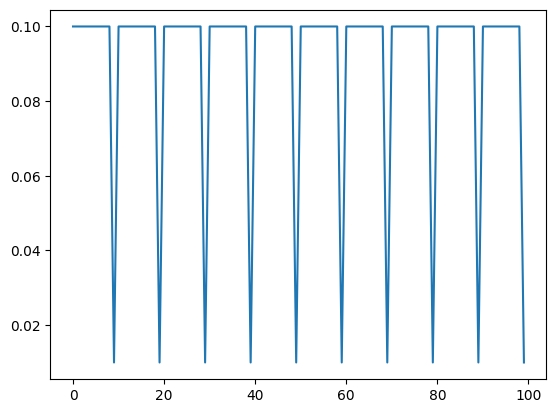

In [224]:
lr_lambda = lambda step: 0.1 if step%10 == 0 else 1 # создали lambda-функцию

# передаем в scheduler opt (создали в ячейке выше) и lambda-функцию lr_lambda
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda=lr_lambda)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### MultiStepLR

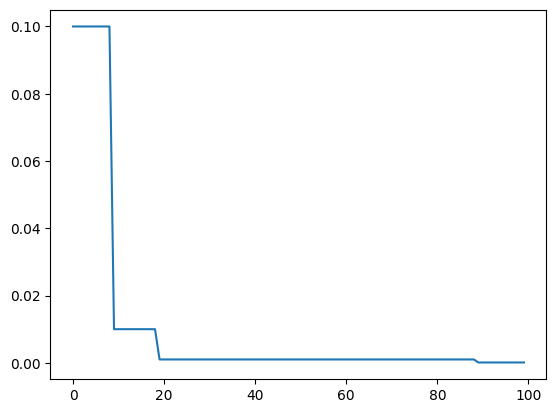

In [225]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)

lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10,20, 90], gamma=0.1)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### StepLR

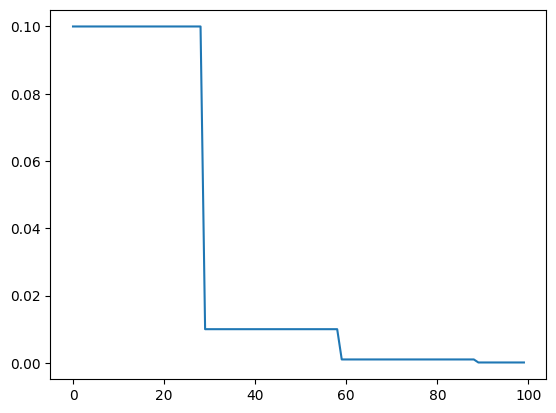

In [226]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### Exponential_LR

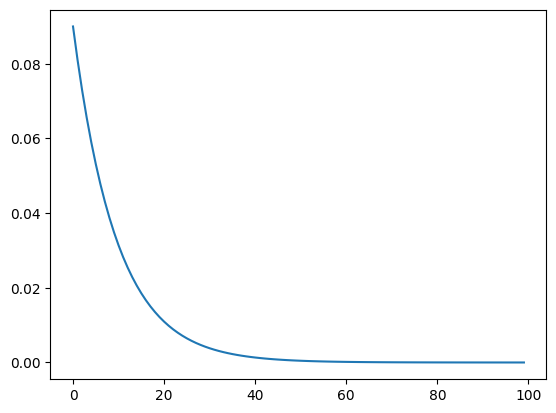

In [227]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # завершение одной эпохи - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    lr_scheduler.step()
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

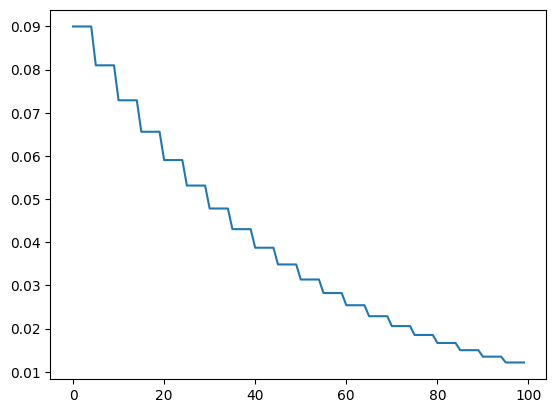

In [228]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

list_ = []
for epoch in range(100):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    # вызываем на каждой 5ой эпохе - счетчик schrduler увеличивается на 1 (изначально счетчик schrduler = 0)
    if epoch % 5 == 0:
        lr_scheduler.step()
    
    # получаем новое значение скорости обучения
    lr = lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_.append(lr)

plt.plot(list_)
plt.show()

### ReduceLROnPlateau

In [263]:
# переопределим opt
opt = torch.optim.Adam(my_model.parameters(), lr = 0.1)
plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                            opt,                  # оптимизатор
                            mode='min',           # 'max' или 'min' - следим, чтобы отслеживаемый параметр уменьшался ('min') или увеличивался ('max')
                            factor=0.1,           # коэффициент, на который будет умножен lr (0.1 = уменьшение в 10 раз)
                            patience=8,          # кол-во эпох без улучшения отслеживаемого параметра
                            threshold=0.0001,     # порог, на который должен измениться отслеживаемый параметр
                            threshold_mode='rel', # 'rel' или 'abs'. Если 'rel', то отслеживаемый параметр должен измениться на threshold процентов, 
                                                  #    если abs - то просто на  threshold
                            cooldown=0,           # кол-во периодов ожидания после уменьшения lr
                            min_lr=0,             # минимальное значение скорости обучения
                            eps=1e-8              # минимальное изменение между новым и старым lr
                        )

In [264]:
# Сымитируем работу функции потерь

loss_LRS = torch.full([5, 10], 0.1)
loss_LRS = loss_LRS * torch.tensor([1/i for i in range(1, 6)]).reshape([5,1])
loss_LRS = loss_LRS.reshape([50])
loss_LRS

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500, 0.0500, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333, 0.0333,
        0.0333, 0.0333, 0.0333, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0200, 0.0200, 0.0200, 0.0200, 0.0200,
        0.0200, 0.0200, 0.0200, 0.0200, 0.0200])

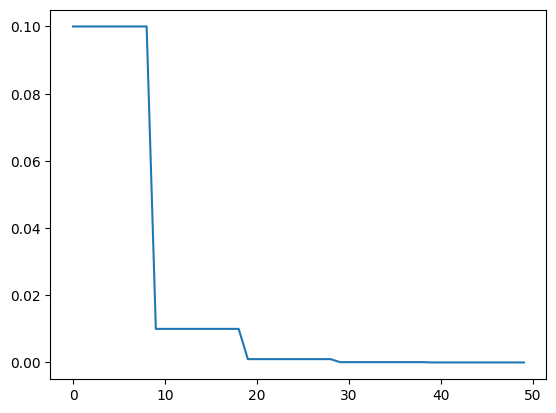

In [265]:
list_LRS = []
for epoch in range(50):

    # Train
    for _ in range(1):
        # forward pass
        # backward pass
        opt.step()

    # Validation
        # forward pass

    idx = epoch
    plateau_lr_scheduler.step(loss_LRS[idx])
    
    # получаем новое значение скорости обучения
    lr = plateau_lr_scheduler.get_last_lr()
    # добавляем в список для графика
    list_LRS.append(lr)
    
plt.plot(list_LRS)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))

ax.plot(loss_LRS)
ax.plot(list_LRS)

ax.set_xlim(0, 52)
ax.set_ylim(0, 0.11)

ax.xaxis.set_major_locator(MultipleLocator(5))

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='major', color='#CCCCCC', linestyle='--', alpha=0.4)
ax.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.3)

ax.legend(['loss', 'lr'])
ax.set_xlabel('epochs')

if plateau_lr_scheduler.threshold_mode == "abs":
    ax.text(10, 0.08, 'Изменение loss на 0.05')
    ax.text(20, 0.04, 'Изменение loss на 0.0167')
    ax.text(30, 0.028, 'Изменение loss на 0.008')
    ax.text(40, 0.022, 'Изменение loss на 0.005')
else:
    ax.text(10, 0.08, 'Изменение loss на 50% (0.5)')
    ax.text(20, 0.04, 'Изменение loss на 33.39% (0.3339)')
    ax.text(30, 0.028, 'Изменение loss на 24.9% (0.249)')
    ax.text(40, 0.022, 'Изменение loss на 20% (0.2)')

ax.text(39, 0.092, f'mode="{plateau_lr_scheduler.mode}"')
ax.text(39, 0.088, f'factor={plateau_lr_scheduler.factor}')
ax.text(39, 0.084, f'patience={plateau_lr_scheduler.patience}')
ax.text(39, 0.080, f'threshold={plateau_lr_scheduler.threshold}')

plt.show()

## Сохранение объекта (модели)

In [9]:
dict_1 = {"key_1": torch.tensor([1, 2, 3]), "key_2": torch.tensor([2, 3, 4])}
dict_1

{'key_1': tensor([1, 2, 3]), 'key_2': tensor([2, 3, 4])}

In [10]:
# полное сохранение объекта (можно использовать для модели), но рекомендуется для моделей делать save_dict()

torch.save(dict_1, 'dict_1.pt')

In [11]:
new_dict = torch.load('dict_1.pt')
new_dict

{'key_1': tensor([1, 2, 3]), 'key_2': tensor([2, 3, 4])}

## Задача классификации

Для данной задачи будет использован датасет **MNIST**.

### Трансформация MNIST в файловую структуру

In [104]:
#считываем данные в переменные

train_dataset = torchvision.datasets.MNIST(root='/content/sample_data/', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/sample_data/', train=False, download=True)

100.0%
100.0%
100.0%
100.0%


In [105]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/sample_data/
    Split: Train

**Формат MNIST файлов:**
 - t10k-images-idx3-ubyte - это ОДИН бинарный файл, который содержит ВСЕ 10,000 тестовых изображений
 - t10k-labels-idx1-ubyte - это ОДИН бинарный файл, который содержит ВСЕ 10,000 соответствующих меток

**Структура файлов:**
 - Для файла с изображениями:
   
     [магическое число] [количество изображений] [высота] [ширина]
   
     [пиксели изображения 1]
   
     [пиксели изображения 2]
   
     ...
   
     [пиксели изображения 10000]
   
 - Для файла с метками:
   
     [магическое число] [количество меток]

   
     [метка 1] [метка 2] ... [метка 10000]

**Магическое число нужно, так как это:**
 - Идентификация формата - программа может проверить, что это действительно MNIST файл
 - Защита от ошибок - если магическое число не совпадает, файл поврежден или имеет неверный формат
 - Определение endianness - порядок байтов (big-endian в случае MNIST)
     

In [106]:
len(train_dataset)

60000

In [107]:
train_dataset[2000]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [108]:
train_dataset[2000][0]

In [109]:
train_dataset[2000][1]

5

#### Функция считывания данных MNIST
 - реализована так, чтобы все данные считывались разово, а не поэлементно
 - данные считываются в бинарном формате

In [4]:
def read_MNIST_ds(dataset):
    # Проверяем, какой датасет нужно загрузить - тренировочный или тестовый
    if dataset == "training":
        # Путь к файлу с изображениями тренировочного набора
        path_img = "/content/sample_data/MNIST/raw/train-images-idx3-ubyte"
        # Путь к файлу с метками тренировочного набора
        path_lbl = "/content/sample_data/MNIST/raw/train-labels-idx1-ubyte"
    
    elif dataset == "testing":
        # Путь к файлу с изображениями тестового набора
        path_img = "/content/sample_data/MNIST/raw/t10k-images-idx3-ubyte"
        # Путь к файлу с метками тестового набора
        path_lbl = "/content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte"
    
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    # Открываем файл с метками для чтения в бинарном режиме
    with open(path_lbl, 'rb') as f_lable:
        # Читаем первые 8 байт и распаковываем их как два беззнаковых целых числа (big-endian)
        # Первое число - магическое число, второе - количество меток
        magic, lbl_size = struct.unpack(">II", f_lable.read(8))
        if magic != 2049:
            raise ValueError("Это не MNIST lables файл!")
        else:
            # Читаем оставшиеся байты файла и сохраняем как массив знаковых байтов
            lables_arr = array("b", f_lable.read())

    # Открываем файл с изображениями для чтения в бинарном режиме
    with open(path_img, 'rb') as f_img:
        # Читаем первые 16 байт и распаковываем как четыре беззнаковых целых числа (big-endian)
        # Магическое число, количество изображений, количество строк, количество столбцов
        magic, img_size, rows, cols = struct.unpack(">IIII", f_img.read(16))
        if magic != 2051:
            raise ValueError("Это не MNIST images файл!")
        else:
            # Читаем оставшиеся байты файла и сохраняем как массив беззнаковых байтов
            img_arr = array("B", f_img.read())

    if lbl_size == img_size:
        size = img_size
    else:
        print('Количество меток не соответствует количеству изображений')
        
    return lables_arr, img_arr, size, rows, cols

In [111]:
read_done = read_MNIST_ds('testing')

In [132]:
[type(i) for i in read_done]

[array.array, array.array, int, int, int]

In [134]:
print([i[:10] for i in read_done if isinstance(i, array)])

[array('b', [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]), array('B', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


#### Преобразование MNIST-датасета из бинарного формата в отдельные JPEG файлы, организованные по папкам классов

In [113]:
def write_dataset(labels, data, size, rows, cols, output_dir):

    #-----------------------------------------------------# 
    #             Подготовка папок с классами             #
    #-----------------------------------------------------#
    
    # Словарь с именами папок для каждого класса (0-9)
    classes = {i: f"class_{i}" for i in range(10)}

    # Список путей к папкам для каждого класса
    #пример ...education\neural_networks_course\libs\pytorch\mnist_dataset\training\class_0

    output_dirs = [
        path.join(output_dir, classes[i])
        for i in range(10)
    ]
    
    # Сооздание папок, если они не существуют
    for dir in output_dirs:
            if not path.exists(dir):
                os.makedirs(dir)
                print(f"Создана папка: {dir}") 

    #-----------------------------------------------------# 
    # Запись данных - основной цикл по всем изображениям  #
    #-----------------------------------------------------#
    
    for (i, label) in enumerate(labels):
            # Имя файла: "/training/class_0/123.jpg"
            output_filename = path.join(output_dirs[label], str(i) + ".jpg")
            print("writing: " + output_filename)

            with open(output_filename, "wb") as h:
            # Извлекаем пиксели каждого изображения из большого массива
                data_i = [
                    data[ (i*rows*cols + j*cols) : (i*rows*cols + (j+1)*cols) ]
                    for j in range(rows)
                ]
                
             # Преобразует в numpy массив размером rows x cols
            data_array = np.asarray(data_i)
        
             # Создаем изображение из массива и сохраняет как JPEG с именем файла, сделанном в первом пункте цикла
            im = Image.fromarray(data_array)
            im.save(output_filename)

In [118]:
# Проверка, куда сохраняю файлы

output_path = os.path.join(os.getcwd(), "ds/mnist")
print("Папка будет создана здесь:", output_path)

Папка будет создана здесь: C:\Users\metel\education\neural_networks_course\libs\ds/mnist


In [ ]:
# Обрабатывает оба датасета: тренировочный и тестовый
for dataset in ["training", "testing"]:
    write_dataset(*read_MNIST_ds(dataset), path.join(output_path, dataset))

### Создание своего класса для датасета MNIST
пользовательский класс с 3 методами:
- Конструктор
- Получение длины датасета
- Извлечение кортежа (образец, ответ)

In [12]:
# Наследование от класса Dataset из torch.utils.data

class MNIST_DS(Dataset):
    def __init__(self, path, transform=None):
        self.path = path             #переданный путь до папки класса
        self.transform = transform   #трансформация - будет использоваться дальше, т.е. вместо transform будут подставляться различные функции

        self.len_dataset = 0 # длина ds (кол-во файлов в указанной папке)
        self.data_list = []  # список из кортежей (путь до файла, позиция в one-hot векторе)
        self.class_to_index = {}

        for path_dir, dir_list, file_list in os.walk(path): # см. описание ниже
            if path_dir == path:
                self.classes = sorted(dir_list) # названия папок - это и есть классы, поэтому сохраняем в таком виде
                                        # создаем словарь {class_0: 0, class_1:1 ...}
                self.class_to_index = { 
                    cls_name: i for i, cls_name, in enumerate(self.classes)
                }
                continue #создали на уровне папок классов словарь, а то что дальше это уже следующая итерация os.walk(path) с файлами
                
            cls = path_dir.split('\\')[-1]

            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                self.data_list.append((file_path, self.class_to_index[cls]))

            self.len_dataset += len(file_list)        
                

    def __len__(self):
        return self.len_dataset

    
    def __getitem__ (self, index):
        file_path, target = self.data_list[index]
        # sample = np.array(Image.open(file_path)) # возвращает изображение в формате PIL (ф-ция из PIL-library)

        if self.transform is not None:           # если трансформации заданы, то применим их к изображению
            sample = Image.open(file_path)
            sample = self.transform(sample)
        else:
            sample = np.array(Image.open(file_path)) # возвращает изображение в формате PIL (ф-ция из PIL-library)

        return sample, target

**os.walk(path)**:

   это генератор, который рекурсивно обходит дерево каталогов и возвращает информацию о файлах и папках
- path - текущий путь
- dir_list - список поддиректорий
- file_list - список файлов

**Сбалансированность классов**

In [13]:
mnist_path = os.path.join(os.getcwd(), "ds/mnist/training")

In [14]:
sum_ = 0
for path, dir_list, file_list in os.walk(mnist_path):
    print(f'{path.split("/")[-1]}')
    print(f'  - количество файлов: {len(file_list)}')
    sum_ += len(file_list)
print(sum_)

training
  - количество файлов: 0
training\class_0
  - количество файлов: 5923
training\class_1
  - количество файлов: 6742
training\class_2
  - количество файлов: 5958
training\class_3
  - количество файлов: 6131
training\class_4
  - количество файлов: 5842
training\class_5
  - количество файлов: 5421
training\class_6
  - количество файлов: 5918
training\class_7
  - количество файлов: 6265
training\class_8
  - количество файлов: 5851
training\class_9
  - количество файлов: 5949
60000


#### Создание тренировочного и тестового датасетов

In [15]:
train_data = MNIST_DS(os.path.join(os.getcwd(), "ds/mnist/training"))
test_data = MNIST_DS(os.path.join(os.getcwd(), "ds/mnist/testing"))

In [16]:
train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [17]:
train_data.class_to_index

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [18]:
train_data.len_dataset

60000

In [19]:
test_data.len_dataset

10000

In [20]:
# Представление в виде one-hot vector

for cls, one_hot_position in train_data.class_to_index.items():
    zero_mtx = np.zeros(10)
    zero_mtx[one_hot_position] = 1
    print(cls, ' => ',zero_mtx)

class_0  =>  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
class_1  =>  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
class_2  =>  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
class_3  =>  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
class_4  =>  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
class_5  =>  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
class_6  =>  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
class_7  =>  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
class_8  =>  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
class_9  =>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [21]:
# Проверка метода len

print(f'Длина тренировочного датасета: {len(train_data)}')
print(f'Длина тестового датасета:      {len(test_data)}')

Длина тренировочного датасета: 60000
Длина тестового датасета:      10000


Класс - class_5


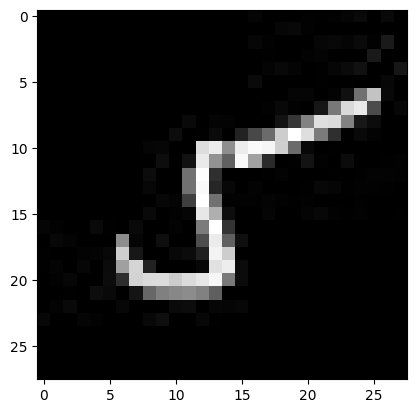

In [22]:
# Проверка метода getitem
# index: 0 ... 59999

img, target_class = train_data[32641]

print(f'Класс - {train_data.classes[target_class]}')
plt.imshow(img, cmap = 'gray')

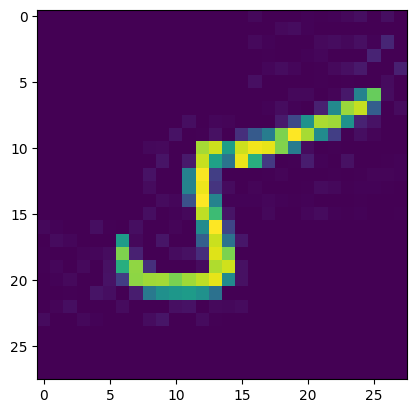

In [23]:
plt.imshow(img)

#### Обучающая, Валидационная и Тестовая выборки

In [24]:
# Разбиение на выборки

train_data, val_data = random_split(train_data, [0.8, 0.2])

In [25]:
print(f'Длина тренировочных данных: {len(train_data)}')
print(f'Длина валидационных данных: {len(val_data)}')
print(f'Длина тестового данных:     {len(test_data)}')

Длина тренировочных данных: 48000
Длина валидационных данных: 12000
Длина тестового данных:     10000


In [26]:
# Разбиение на батчи

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [20]:
for i, (samples, target) in enumerate(train_loader):
     if i < 3:
         print(f"Номер batch = {i+1}")
         print(f"    размер samples = {samples.shape}")
         print(f"    размер target = {target.shape}")

print('\n ...... \n')
print(f"Номер batch = {i+1}")
print(f"    размер samples = {samples.shape}")
print(f"    размер target = {target.shape}")

Номер batch = 1
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])
Номер batch = 2
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])
Номер batch = 3
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])

 ...... 

Номер batch = 3000
    размер samples = torch.Size([16, 28, 28])
    размер target = torch.Size([16])


### Применение трансформаций

In [27]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype = torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std = (0.5,))
    ]
)                            

In [100]:
mnist_train_data_obj = MNIST_DS(os.path.join(os.getcwd(), "ds/mnist/training"), transform=transform)
mnist_test_data = MNIST_DS(os.path.join(os.getcwd(), "ds/mnist/testing"), transform=transform)

In [101]:
mnist_img, mnist_class = mnist_test_data[3187]

print(f'\033[94mimg:\033[0m')
print(f'   {type(mnist_img)}')
print(f'   {mnist_img.shape}')
print(f'   {mnist_img.dtype}')
print(f'   min = {mnist_img.min()}, max = {mnist_img.max()}')
print(f'\033[94mclass:\033[0m')
print(f'   {mnist_class}')

img:
   <class 'torchvision.tv_tensors._image.Image'>
   torch.Size([1, 28, 28])
   torch.float32
   min = -1.0, max = 1.0
class:
   3


In [102]:
# Разбиение на выборки
mnist_train_data, mnist_val_data = random_split(mnist_train_data, [0.8, 0.2])

In [36]:
# Разбиение на батчи

mnist_train_loader = DataLoader(mnist_train_data, batch_size=16, shuffle=True)
mnist_val_loader = DataLoader(mnist_val_data, batch_size=16, shuffle=False)
mnist_test_loader = DataLoader(mnist_test_data, batch_size=16, shuffle=False)

In [12]:
mnist_imgs, mnist_classes = next(iter(mnist_train_loader))

print(f'\033[94mimg:\033[0m')
print(f'   {type(mnist_imgs)}')
print(f'   {mnist_imgs.shape}')
print(f'   {mnist_imgs.dtype}')

print(f'\033[94mclass:\033[0m')
print(f'   {type(mnist_classes)}')
print(f'   {mnist_classes.shape}')
print(f'   {mnist_classes.dtype}')
print(f'\n   {mnist_classes}')


img:
   <class 'torch.Tensor'>
   torch.Size([16, 1, 28, 28])
   torch.float32
class:
   <class 'torch.Tensor'>
   torch.Size([16])
   torch.int64

   tensor([4, 4, 3, 0, 6, 6, 6, 7, 6, 8, 7, 8, 1, 6, 5, 5])


### Создание модели для классификации MNIST

In [61]:
class MnistModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.dropout = nn.Dropout(0.5)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        x = self.dropout(x)
        out = self.layer_2(x)

        return out

In [62]:
model_classification = MnistModel(784, 10).to(device)

In [63]:
# проверка правильности построения модели при помощи рандомного тензора

check_input = torch.rand([16,784], dtype = torch.float32).to(device)
check_output = model_classification(check_input)
check_output.shape

torch.Size([16, 10])

### Тренировка модели

In [64]:
# Определяем функцию потерь и оптимизатор градиентного спуска

loss_classification = nn.CrossEntropyLoss()
opt_classification = torch.optim.Adam(model_classification.parameters(), lr=0.001)

In [66]:
mnist_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                            opt_classification,   # оптимизатор
                            mode='min',           # 'max' или 'min'
                            factor=0.1,           # коэффициент, на который будет умножен lr
                            patience=5            # кол-во эпох без улучшения отслеживаемого параметра
                        )

In [68]:
EPOCHS = 5

train_loss = []
val_loss = []
train_acc = []
val_acc = []
mnist_lr_list = []
best_loss = None
count = 0
last_saved_mnist_model = ''

for epoch in range(EPOCHS):

    #режим тренировки
    model_classification.train()
    running_train_loss = []
    train_true_answers = 0
    train_loop = tqdm(mnist_train_loader, leave=False)
    for x, targets in train_loop:
        # (batch_size, 1, 28, 28) -> (batch_size, 728)
        x = x.reshape(-1, 28*28).to(device)
        # (batch_size, int) -> (batch_size, 10)
        targets = targets.reshape(-1).to(torch.int32)
        targets = torch.eye(10)[targets].to(device)


        # прямой проход + расчет ошибки модели
        pred = model_classification(x)
        # pred - ответ модели,  target - правильные ответы -> подаем на вход ф-ции потерь
        loss = loss_classification(pred, targets)

        # обратный проход
        opt_classification.zero_grad() #обнуляем градиенты для каждого батча
        loss.backward() # рассчитываем градиенты для текущего батча

        # шаг оптимизации
        opt_classification.step() # Используем градиенты из шага выше для обновления весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss)/len(running_train_loss)

        train_true_answers += (targets.argmax(dim=1) == pred.argmax(dim=1)).sum().item()

        train_loop.set_description(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}') 

    # Расчет метрик
    train_accuracy = train_true_answers/len(mnist_train_data)
    
    # Сохранение значений функции потерь
    train_loss.append(mean_train_loss)
    train_acc.append(train_accuracy)
    

    #режим оценки
    model_classification.eval()
    with torch.no_grad():
        running_val_loss = []
        val_true_answers = 0
        val_loop = tqdm(mnist_val_loader, leave=False)
        for x, targets in val_loop:
            # (batch_size, 1, 28, 28) -> (batch_size, 728)
            x = x.reshape(-1, 28*28).to(device)
            # (batch_size, int) -> (batch_size, 10)
            targets = targets.reshape(-1).to(torch.int32)
            targets = torch.eye(10)[targets].to(device)

            # прямой проход + расчет ошибки модели
            pred = model_classification(x)
            # pred - ответ модели,  target - правильные ответы -> подаем на вход ф-ции потерь
            loss = loss_classification(pred, targets)


            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss)/len(running_val_loss)

            val_loop.set_description(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_val_loss:.4f}') 

            val_true_answers += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()

        # Расчет метрик
        val_accuracy = val_true_answers / len(mnist_val_data)
        
    # Сохранение значений функции потерь
    val_loss.append(mean_val_loss)
    val_acc.append(val_accuracy)

    mnist_lr_scheduler.step(mean_val_loss)
    lr = mnist_lr_scheduler.get_last_lr()[0]
    mnist_lr_list.append(lr)
        

    print(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}, train_acc={train_accuracy:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_accuracy:.4f}')

    if best_loss is None:
        best_loss = mean_val_loss

    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        count = 0

        checkpoint = {
                        'class_to_index': mnist_train_data_obj.class_to_index,
                        'state_model': model_classification.state_dict(),     # веса модели
                        'state_opt': opt_classification.state_dict(),             # состояние оптимизатора
                        'state_lr_scheduler': mnist_lr_scheduler.state_dict(),  # состояние scheduler
                        'loss': {                                  # метрики потерь
                            'train_loss': train_loss,
                            'val_loss': val_loss,
                            'best_loss': best_loss
                        },
                        'metric': {                                # метрики accuracy
                            'train_acc': train_acc,
                            'val_acc': val_acc,
                        },
                        'lr': mnist_lr_list,                         # история learning rate
                        'epoch': {                                 # информация об эпохах
                            'EPOCHS': EPOCHS,
                            'save_epoch': epoch
                        }
                    }

        if os.path.exists(last_saved_mnist_model):
            os.remove(last_saved_mnist_model)
        last_saved_mnist_model = f'models/mnist_model_checkpoint_epoch_{epoch+1}.pt'
        torch.save(checkpoint, last_saved_mnist_model)
        print(f'На эпохе = {epoch+1} сохранена модель {last_saved_mnist_model}. Функция потерь на валидации: {mean_val_loss:.4f}', end='\n\n')
    
    if count >= 10:
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break

    count += 1


        

Epoch: [1/5], train_loss = 0.3786, train_acc=0.8824, val_loss=0.2056, val_acc=0.9396


Epoch: [2/5], train_loss = 0.3669, train_acc=0.8855, val_loss=0.1902, val_acc=0.9462
На эпохе = 2, сохранена модель. Функция потерь на валидации: 0.1902



Epoch: [3/5], train_loss = 0.3444, train_acc=0.8910, val_loss=0.1950, val_acc=0.9417


Epoch: [4/5], train_loss = 0.3331, train_acc=0.8946, val_loss=0.1978, val_acc=0.9410


Epoch: [5/5], train_loss = 0.3293, train_acc=0.8973, val_loss=0.1806, val_acc=0.9461
На эпохе = 5, сохранена модель. Функция потерь на валидации: 0.1806



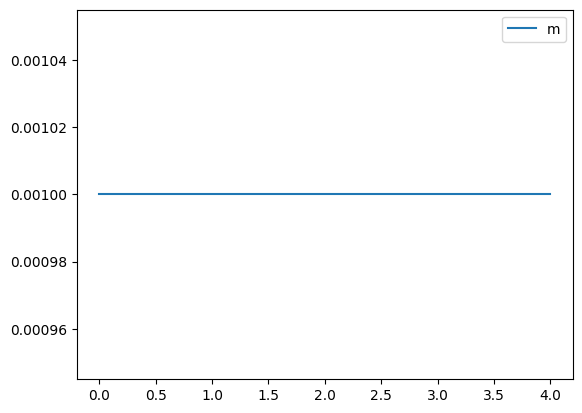

In [69]:
plt.plot(mnist_lr_list)
plt.legend('mnist_lr_list')
plt.show()

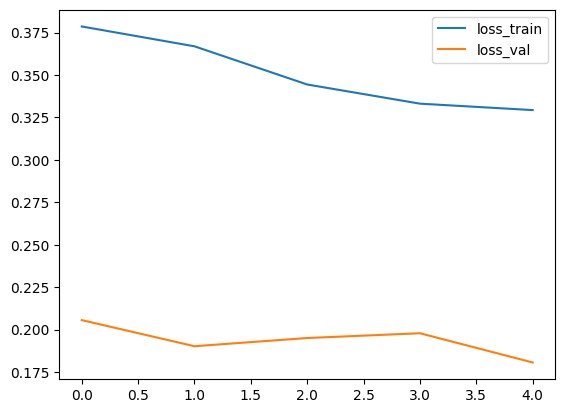

In [70]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss_train', 'loss_val'])
plt.show()

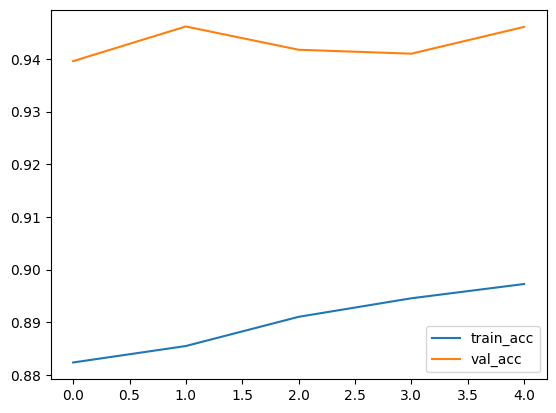

In [71]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['train_acc', 'val_acc'])
plt.show()

### Проверка модели

In [72]:
checkpoint = torch.load('models/mnist_model_checkpoint_epoch_5.pt')
model_classification.load_state_dict(checkpoint['state_model'])

<All keys matched successfully>

In [ ]:
model_classification.eval()
    with torch.no_grad():
        running_test_loss = []
        test_true_answers = 0
        for x, targets in mnist_test_loader:
            x = x.reshape(-1, 28*28).to(device)
            targets = targets.reshape(-1).to(torch.int32)
            targets = torch.eye(10)[targets].to(device)

            # прямой проход + расчет ошибки модели
            pred = model_classification(x)
            loss = loss_classification(pred, targets)

            running_test_loss.append(loss.item())
            mean_test_loss = sum(running_test_loss)/len(running_test_loss)
            
            test_true_answers += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()

        # Расчет метрик
        running_test_acc = test_true_answers / len(mnist_test_data)

    print(f'test_loss = {mean_test_loss:.4f}, train_acc={running_test_acc:.4f}', end = '\n\n')

### Использование класса ImageFolder

#### Создание трансформаций

In [90]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Grayscale(), # эта трансформация нужна, чтобы сделать один цветовой канал как в нашем датасете
        v2.ToDtype(dtype = torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std = (0.5,))
    ]
)                            

#### Создание тренировочного и тестового датасетов

In [91]:
imf_train_data = ImageFolder(root = os.path.join(os.getcwd(), "ds/mnist/training"), transform=transform)
imf_test_data = ImageFolder(root = os.path.join(os.getcwd(), "ds/mnist/testing"), transform=transform)                        

In [92]:
imf_train_data.classes

['class_0',
 'class_1',
 'class_2',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [93]:
imf_train_data.class_to_idx

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9}

In [94]:
# Проверка метода len

print(f'Длина тренировочного датасета: {len(imf_train_data)}')
print(f'Длина тестового датасета:      {len(imf_test_data)}')

Длина тренировочного датасета: 60000
Длина тестового датасета:      10000


In [ ]:
 imf_train_data[32641]

Класс - class_5


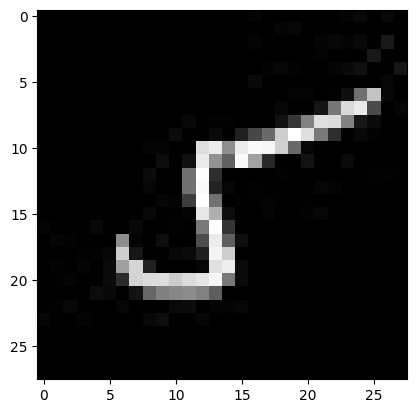

In [101]:
# Проверка метода getitem
# index: 0 ... 59999

imf_img, target_class = imf_train_data[32641]

print(f'Класс - {imf_train_data.classes[target_class]}')
plt.imshow(imf_img.squeeze().numpy(), cmap = 'gray')

#### Обучающая, Валидационная и Тестовая выборки

In [102]:
# Разбиение на выборки

imf_train_data, imf_val_data = random_split(imf_train_data, [0.8, 0.2])

In [103]:
print(f'Длина тренировочных данных: {len(imf_train_data)}')
print(f'Длина валидационных данных: {len(imf_val_data)}')
print(f'Длина тестового данных:     {len(imf_test_data)}')

Длина тренировочных данных: 48000
Длина валидационных данных: 12000
Длина тестового данных:     10000


In [104]:
# Разбиение на батчи

imf_train_loader = DataLoader(imf_train_data, batch_size=16, shuffle=True)
imf_val_loader = DataLoader(imf_val_data, batch_size=16, shuffle=False)
imf_test_loader = DataLoader(imf_test_data, batch_size=16, shuffle=False)

In [105]:
imf_imgs, imf_classes = next(iter(imf_train_loader))

print(f'\033[94mimg:\033[0m')
print(f'   {type(imf_imgs)}')
print(f'   {imf_imgs.shape}')
print(f'   {imf_imgs.dtype}')

print(f'\033[94mclass:\033[0m')
print(f'   {type(imf_classes)}')
print(f'   {imf_classes.shape}')
print(f'   {imf_classes.dtype}')
print(f'\n   {imf_classes}')

img:
   <class 'torch.Tensor'>
   torch.Size([16, 1, 28, 28])
   torch.float32
class:
   <class 'torch.Tensor'>
   torch.Size([16])
   torch.int64

   tensor([1, 3, 9, 6, 0, 8, 1, 1, 0, 6, 5, 1, 3, 6, 8, 2])


## Задача регресии

In [5]:
# Импорт библиотек

import json

In [155]:
# проверка работы метода для дальнейшего использования

os.path.isdir("ds\\MNIST")

True

### Генерация изображений с белыми квадратами на черном фоне

In [6]:
# Создание директории для датасета
if not os.path.isdir("ds\\BWSquare"):
    os.mkdir("ds\\BWSquare")

# Генерация 100000 черных изображений 64x64, 0-50 = оттенки черного
img = np.random.randint(0, 50, [100000, 64, 64], dtype=np.uint8)
# Генерация 100000 белых квадратов 15x15  100-200 = оттенки белого
white_squares = np.random.randint(100, 200, [100000, 15, 15], dtype=np.uint8)

# Массив для координат центра квадрата
coords = np.empty([100000, 2])

data = {}
for i in range(img.shape[0]):
    # Случайные координаты центра квадрата (в пределах 20-44)
    x = np.random.randint(20, 44)
    y = np.random.randint(20, 44)
    
    # Вставка белого квадрата в черное изображение
    img[i, (y - 7):(y + 8), (x - 7):(x + 8)] = white_squares[i]
    
    # Сохранение координат
    coords[i] = [y, x]
    
    # Сохранение изображения как JPEG
    name_img = f'img_{i}.jpeg'
    path_img = os.path.join('ds\\BWSquare\\', name_img)
    image = Image.fromarray(img[i])
    image.save(path_img)
    
    # Добавление в словарь аннотаций
    data[name_img] = [y, x]

# Сохранение всех аннотаций в JSON файл
with open('ds\\BWSquare\\coords.json', 'w') as f:
    json.dump(data, f, indent=2)   

KeyboardInterrupt: 

### Создание пользовательского класса BWSquare_DS

In [138]:
# проверка для дальнейшего использования

with open('ds\\BWSquare\\coords.json', 'r') as f:
            target_dict = json.load(f)
print(type(target_dict))  # <class 'dict'>
print(len(target_dict))   # количество элементов
print(target_dict['img_4.jpeg'])

<class 'dict'>
100000
[37, 42]


In [163]:
class BWSquare_DS(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        self.img_list = []
        with open('ds\\BWSquare\\coords.json', 'r') as f:
            self.target_dict = json.load(f)
            
        for root, dirs, files in os.walk('ds\\BWSquare'):
            for file in files:
                full_path = os.path.join('ds\\BWSquare\\', file)
                if file in self.target_dict:
                    self.img_list.append((full_path, self.target_dict[file]))

        self.len_dataset = len(self.img_list)

        

    def __len__(self):
        return self.len_dataset

    def __getitem__(self, index):


        if self.transform is not None:
            img = Image.open(self.img_list[index][0])
            img = self.transform(img)
            coord = torch.tensor(self.img_list[index][1], dtype=torch.float32)

        else:
            img = np.array(Image.open(self.img_list[index][0]))
            coord = np.array(self.img_list[index][1])
        
        return img, coord
        

In [164]:
bws_dataset = BWSquare_DS(os.path.join(os.getcwd(), "ds/BWSquare"))

In [165]:
len(bws_dataset)

100000

Координаты центра: [20 25]


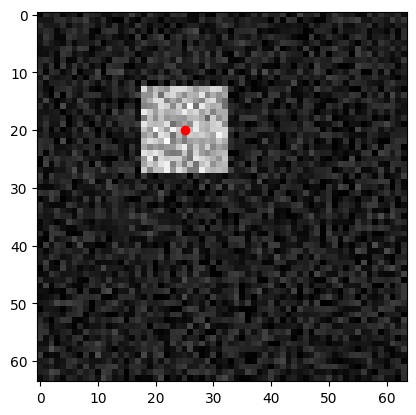

In [166]:
img, coord = bws_dataset[1874]
print(f'Координаты центра: {coord}')
plt.scatter(coord[1], coord[0], marker='o', color='red') # (x, y, marker=кружок, color=красный)
plt.imshow(img, cmap='gray')
plt.show() #красивый вывод (без наименования/характеристик объекта)

#### Обучающая, Валидационная и Тестовая выборки

In [167]:
bws_train_data, bws_val_data, bws_test_data = random_split(bws_dataset, [0.7, 0.1, 0.2])

In [168]:
print(f'Длина тренировочных данных: {len(bws_train_data)}')
print(f'Длина валидационных данных: {len(bws_val_data)}')
print(f'Длина тестового данных:     {len(bws_test_data)}')

Длина тренировочных данных: 70000
Длина валидационных данных: 10000
Длина тестового данных:     20000


In [169]:
# Разбиение на батчи

bws_train_loader = DataLoader(bws_train_data, batch_size=64, shuffle=True)
bws_val_loader = DataLoader(bws_val_data, batch_size=64, shuffle=False)
bws_test_loader = DataLoader(bws_test_data, batch_size=64, shuffle=False)

In [ ]:
for i, (samples, target) in enumerate(bws_train_loader):
     if i < 3:
         print(f"Номер batch = {i+1}")
         print(f"    размер samples = {samples.shape}")
         print(f"    размер target = {target.shape}")

print('\n ...... \n')
print(f"Номер batch = {i+1}")
print(f"    размер samples = {samples.shape}")
print(f"    размер target = {target.shape}")

Номер batch = 1
    размер samples = torch.Size([64, 64, 64])
    размер target = torch.Size([64, 2])
Номер batch = 2
    размер samples = torch.Size([64, 64, 64])
    размер target = torch.Size([64, 2])
Номер batch = 3
    размер samples = torch.Size([64, 64, 64])
    размер target = torch.Size([64, 2])


### Класс EarlyStopping

In [170]:
class EarlyStopping:
    def __init__(self, mode='min', patience=10, threshold=0.0001, threshold_mode='rel'):
        if mode not in {'min', 'max'}:
            raise ValueError(f"Параметр mode может принимать только значения max и min.")
        if threshold_mode not in {'rel', 'abs'}:
            raise ValueError(f"Параметр threshold_mode может принимать только значения rel и abs.")
        if not isinstance(patience, int):
            raise TypeError(f"Параметр patience должен быть целым числом.")
        if not isinstance(threshold, float):
            raise TypeError(f"Параметр threshold должен быть float.")
        if threshold >= 1.0:
            raise ValueError(f"Параметр threshold должен быть меньше 1,0.")
        
        self.mode = mode
        self.patience = patience
        self.threshold = threshold
        self.threshold_mode = threshold_mode
        self.count = 0
        self.best = None


    def __call__(self, tracked_parameter): # tracked_parameter - это либо ф-ция потерь, либо значение метрики
        current = float(tracked_parameter)
        
        if self.best is None:
            self.best = current
            return False
        
        if self.changed_better(current, self.best):
            self.best = current
            self.count = 0
        else:
            self.count += 1
        
        if self.count >= self.patience:
            return True  # сигнал к остановке
        return False  # продолжаем обучение


    def changed_better(self, current, best):
        if self.mode == 'min' and self.threshold_mode == 'rel':
            return current < best * (1 - self.threshold)
        elif self.mode == 'min' and self.threshold_mode == 'abs':
            return current < best - self.threshold
        elif self.mode == 'max' and self.threshold_mode == 'rel':
            return current > best * (1 + self.threshold)
        else:  # mode == 'max' and threshold_mode == 'abs'
            return current > best + self.threshold


### Применение трансформаций

In [171]:
bws_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(dtype = torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std = (0.5,))
    ]
)                            

In [172]:
bws_dataset = BWSquare_DS(os.path.join(os.getcwd(), "ds/BWSquare"), transform=bws_transform)

In [173]:
bws_img, coord = bws_dataset[7]

print(f'\033[94mimg:\033[0m')
print(f'   {type(bws_img)}')
print(f'   {bws_img.shape}')
print(f'   {bws_img.dtype}')
print(f'   min = {bws_img.min()}, max = {bws_img.max()}')

print(f'\033[94mcoord:\033[0m')
print(f'   {type(coord)}')
print(f'   {coord.shape}')
print(f'   {coord.dtype}')
print(f'\n   {coord}')

img:
   <class 'torchvision.tv_tensors._image.Image'>
   torch.Size([1, 64, 64])
   torch.float32
   min = -1.0, max = 0.678431510925293
coord:
   <class 'torch.Tensor'>
   torch.Size([2])
   torch.float32

   tensor([26., 20.])


In [174]:
# Разбиение на выборки
bws_train_data, bws_val_data, bws_test_data = random_split(bws_dataset, [0.7, 0.1, 0.2])

In [175]:
# Разбиение на батчи

bws_train_loader = DataLoader(bws_train_data, batch_size=32, shuffle=True)
bws_val_loader = DataLoader(bws_val_data, batch_size=32, shuffle=False)
bws_test_loader = DataLoader(bws_test_data, batch_size=32, shuffle=False)

In [176]:
bws_imgs, bws_classes = next(iter(bws_train_loader))

print(f'\033[94mimg:\033[0m')
print(f'   {type(bws_imgs)}')
print(f'   {bws_imgs.shape}')
print(f'   {bws_imgs.dtype}')

print(f'\033[94mclass:\033[0m')
print(f'   {type(bws_classes)}')
print(f'   {bws_classes.shape}')
print(f'   {bws_classes.dtype}')

img:
   <class 'torch.Tensor'>
   torch.Size([32, 1, 64, 64])
   torch.float32
class:
   <class 'torch.Tensor'>
   torch.Size([32, 2])
   torch.float32


### Создание модели для задачи регрессии

In [177]:
class RegModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)

        return out

In [178]:
model_regression = RegModel(64*64, 2).to(device)

In [179]:
loss_regression = nn.MSELoss()
opt_regression = torch.optim.Adam(model_regression.parameters(), lr = 0.001)

In [180]:
# проверка правильности построения модели при помощи рандомного тензора

check_input = torch.rand([16,64*64], dtype = torch.float32).to(device)
check_output = model_regression(check_input)
check_output.shape

torch.Size([16, 2])

### Тренировка модели

**Подготовка**

In [117]:
# разбор команды: (будем использовать дальше)
# train_true_answers += (targets == torch.round(pred)).all(dim=1).sum().item()

pred = torch.tensor([[25.1, 44.8], [52.3, 27.8], [12.7, 37.4], [29.3, 27.2]], dtype=torch.float32, requires_grad=True).to(device)
target = torch.tensor([[25, 45], [53, 28], [13, 38], [36, 28]], dtype=torch.float32).to(device)

print("Predicted:")
print(pred)
print("\nTarget:")
print(target)

Predicted:
tensor([[25.1000, 44.8000],
        [52.3000, 27.8000],
        [12.7000, 37.4000],
        [29.3000, 27.2000]], device='cuda:0', grad_fn=<ToCopyBackward0>)

Target:
tensor([[25., 45.],
        [53., 28.],
        [13., 38.],
        [36., 28.]], device='cuda:0')


In [118]:
torch.round(pred)

tensor([[25., 45.],
        [52., 28.],
        [13., 37.],
        [29., 27.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [119]:
torch.round(pred) == target

tensor([[ True,  True],
        [False,  True],
        [ True, False],
        [False, False]], device='cuda:0')

In [120]:
# смотрим по первой оси (построчно) совпала ли точка полностью (по двум координатам)
(torch.round(pred) == target).all(dim=1)

tensor([ True, False, False, False], device='cuda:0')

In [121]:
# суммируем и берем значение из тензора
(torch.round(pred) == target).all(dim=1).sum().item()

1

**ReduceLROnPlateau**

In [181]:
reg_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                            opt_regression,                  # оптимизатор
                            mode='min',           # 'max' или 'min'
                            factor=0.1,           # коэффициент, на который будет умножен lr
                            patience=5          # кол-во эпох без улучшения отслеживаемого параметра
                        )

earlystopping = EarlyStopping(mode='min', patience = 10)

In [182]:
# информация о модели, которую будем сохранять во время обучения

str_info = '''
class RegModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)

        return out
'''

**Приступаем к тренировке**

In [125]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
reg_lr_list = []
reg_best_loss = None
threshold = 0.0001
last_saved_reg_model = ''

In [324]:
EPOCHS = 30

for epoch in range(EPOCHS):

    #режим тренировки
    model_regression.train()
    running_train_loss = []
    train_true_answers = 0
    train_loop = tqdm(bws_train_loader, leave=False)
    for x, targets in train_loop:
        # (batch_size, 1, 64, 64) -> (batch_size, 64*64)
        x = x.reshape(-1, 64*64).to(device)
        # (batch_size, tensor[float, float]) -> оставляем как есть
        targets = targets.to(device)


        # прямой проход + расчет ошибки модели
        pred = model_regression(x)
        # pred - ответ модели,  target - правильные ответы -> подаем на вход ф-ции потерь
        loss = loss_regression(pred, targets)

        # обратный проход
        opt_regression.zero_grad() #обнуляем градиенты для каждого батча
        loss.backward() # рассчитываем градиентами для текущего батча

        # шаг оптимизации
        opt_regression.step() # Используем градиенты из шага выше для обновления весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss)/len(running_train_loss)

        train_true_answers += (targets == torch.round(pred)).all(dim=1).sum().item()

        train_loop.set_description(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}') 

    # Расчет метрик
    train_accuracy = train_true_answers/len(mnist_train_data)
    
    # Сохранение значений функции потерь
    train_loss.append(mean_train_loss)
    train_acc.append(train_accuracy)
    

    #режим оценки
    model_regression.eval()
    with torch.no_grad():
        running_val_loss = []
        val_true_answers = 0
        val_loop = tqdm(bws_val_loader, leave=False)
        for x, targets in val_loop:
            # (batch_size, 1, 64, 64) -> (batch_size, 64*64)
            x = x.reshape(-1, 64*64).to(device)
            # (batch_size, tensor[float, float]) -> оставляем как есть
            targets = targets.to(device)

            # прямой проход + расчет ошибки модели
            pred = model_regression(x)
            # pred - ответ модели,  target - правильные ответы -> подаем на вход ф-ции потерь
            loss = loss_regression(pred, targets)


            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss)/len(running_val_loss)

            val_loop.set_description(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_val_loss:.4f}') 

            val_true_answers += (targets == torch.round(pred)).all(dim=1).sum().item()

        # Расчет метрик
        val_accuracy = val_true_answers / len(mnist_val_data)
        
        # Сохранение значений функции потерь
        val_loss.append(mean_val_loss)
        val_acc.append(val_accuracy)

    reg_lr_scheduler.step(mean_val_loss)
    lr = reg_lr_scheduler.get_last_lr()[0]
    reg_lr_list.append(lr)
    print(lr)

    print(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}, train_acc={train_accuracy:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_accuracy:.4f}, lr={lr:.4f}')

    if reg_best_loss is None:
        reg_best_loss = mean_val_loss

    if mean_val_loss < reg_best_loss - reg_best_loss * threshold:
        best_loss = mean_val_loss

        checkpoint = {
                        'info': str_info,                                     # текстовая информация о модели
                        'state_model': model_regression.state_dict(),         # веса модели
                        'state_opt': opt_regression.state_dict(),             # состояние оптимизатора
                        'state_lr_scheduler': reg_lr_scheduler.state_dict(),  # состояние scheduler
                        'loss': {                                  # метрики потерь
                            'train_loss': train_loss,
                            'val_loss': val_loss,
                            'best_loss': reg_best_loss
                        },
                        'metric': {                                # метрики accuracy
                            'train_acc': train_acc,
                            'val_acc': val_acc,
                        },
                        'lr': reg_lr_list,                         # история learning rate
                        'epoch': {                                 # информация об эпохах
                            'EPOCHS': EPOCHS,
                            'save_epoch': epoch
                        }
                    }

        if os.path.exists(last_saved_reg_model):
            os.remove(last_saved_reg_model)
        last_saved_reg_model = f'models/bws_model_checkpoint_epoch_{epoch+1}.pt'
        torch.save(checkpoint, last_saved_reg_model)
        
        print(f' Эпоха {epoch+1}: функция потерь при валидации - {mean_val_loss:.4f}', end='\n\n')
        print(f' Модель: {last_saved_reg_model}')

    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break
        

0.0001
Epoch: [1/30], train_loss = 0.2197, train_acc=1.3948, val_loss=0.2496, val_acc=0.7163, lr=0.0001


0.0001
Epoch: [2/30], train_loss = 0.2195, train_acc=1.3931, val_loss=0.2314, val_acc=0.7782, lr=0.0001
 Эпоха 2: функция потерь при валидации - 0.2314



0.0001
Epoch: [3/30], train_loss = 0.2192, train_acc=1.3953, val_loss=0.2261, val_acc=0.7852, lr=0.0001
 Эпоха 3: функция потерь при валидации - 0.2261



KeyboardInterrupt: 

In [302]:
reg_lr_list

[0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.001,
 0.0001,
 0.0001,
 0.0001,
 0.0001]

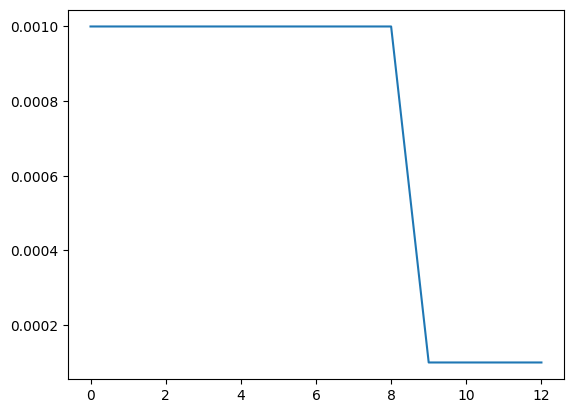

In [303]:
plt.plot(reg_lr_list)
plt.show()

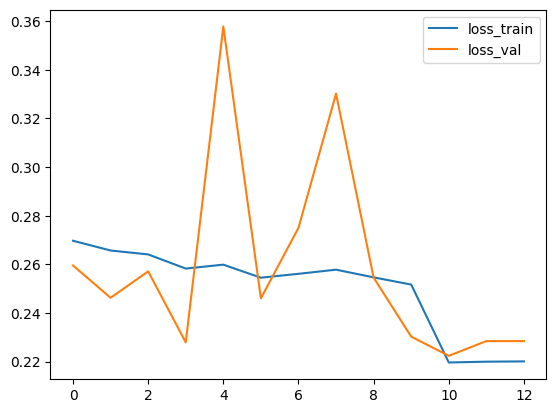

In [304]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss_train', 'loss_val'])
plt.show()

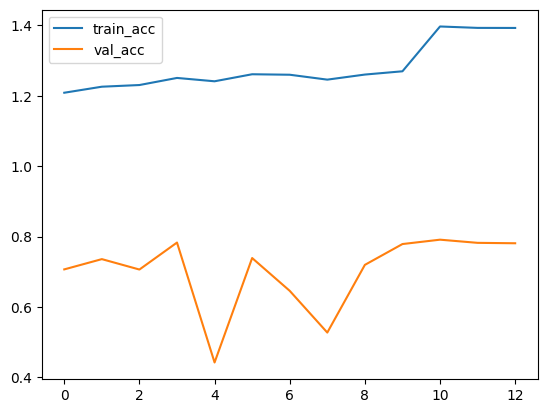

In [305]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(['train_acc', 'val_acc'])
plt.show()

### Загрузка модели

In [310]:
# Загрузка параметров модели

param_model= torch.load('model_state_dict_epoch_2.pt')
param_model

OrderedDict([('layer_1.weight',
              tensor([[ 0.0049,  0.0018,  0.0162,  ..., -0.0124,  0.0031, -0.0209],
                      [-0.0119, -0.0110, -0.0057,  ..., -0.0100,  0.0010, -0.0140],
                      [-0.0046, -0.0034,  0.0039,  ...,  0.0127,  0.0002, -0.0033],
                      ...,
                      [-0.0048,  0.0207,  0.0047,  ...,  0.0157,  0.0177, -0.0062],
                      [ 0.0140,  0.0099,  0.0012,  ...,  0.0196,  0.0059,  0.0176],
                      [ 0.0135, -0.0094, -0.0100,  ..., -0.0156, -0.0062, -0.0055]],
                     device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.0141, -0.0120,  0.0049,  0.0082, -0.0013, -0.0051, -0.0094,  0.0033,
                       0.0039,  0.0055, -0.0030,  0.0077, -0.0062, -0.0137,  0.0049,  0.0086,
                      -0.0210,  0.0064, -0.0187, -0.0029, -0.0013, -0.0208, -0.0011,  0.0144,
                       0.0175, -0.0064, -0.0250,  0.0125,  0.0051, -0.0005, -0.0057,

In [183]:
# Создание новой модели
new_reg_model = RegModel(64*64, 2).to(device)

In [184]:
# используем загруженные параметры для новой модели
new_reg_model.load_state_dict(param_model)

NameError: name 'param_model' is not defined

### Загрузка состояния модели для дальнейшего обучения

In [191]:
last_saved_reg_model = 'models/bws_model_checkpoint_epoch_4.pt'
load_model_state = torch.load(last_saved_reg_model)

In [192]:
print(load_model_state['info'])


class RegModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.layer_2 = nn.Linear(128, output)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)

        return out



In [193]:
# Создание модели
load_reg_model = RegModel(64*64, 2).to(device)

new_loss_model = nn.MSELoss()
load_reg_opt = torch.optim.Adam(load_reg_model.parameters(), lr=0.001)
load_reg_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(load_reg_opt)

# Загрузка сохраненного состояния
load_reg_model.load_state_dict(load_model_state['state_model'])
load_reg_opt.load_state_dict(load_model_state['state_opt'])
load_reg_lr_scheduler.load_state_dict(load_model_state['state_lr_scheduler'])

In [194]:
# Загрузка параметров обучения
EPOCHS = load_model_state['epoch']['EPOCHS']  
save_epoch = load_model_state['epoch']['save_epoch']  

# Загрузка метрик потерь
train_loss = load_model_state['loss']['train_loss']  
val_loss = load_model_state['loss']['val_loss']  
reg_best_loss = load_model_state['loss']['best_loss']

# Загрузка метрик accuracy  
train_acc = load_model_state['metric']['train_acc']  
val_acc = load_model_state['metric']['val_acc']  

# Загрузка истории learning rate
reg_lr_list = load_model_state['lr']

In [195]:
EPOCHS = 5

In [196]:
# обучение - продолжение
for epoch in range(save_epoch + 1, EPOCHS):

    #режим тренировки
    load_reg_model.train()
    running_train_loss = []
    train_true_answers = 0
    train_loop = tqdm(bws_train_loader, leave=False)
    for x, targets in train_loop:
        # (batch_size, 1, 64, 64) -> (batch_size, 64*64)
        x = x.reshape(-1, 64*64).to(device)
        # (batch_size, tensor[float, float]) -> оставляем как есть
        targets = targets.to(device)


        # прямой проход + расчет ошибки модели
        pred = load_reg_model(x)
        # pred - ответ модели,  target - правильные ответы -> подаем на вход ф-ции потерь
        loss = new_loss_model(pred, targets)

        # обратный проход
        load_reg_opt.zero_grad() #обнуляем градиенты для каждого батча
        loss.backward() # рассчитываем градиентами для текущего батча

        # шаг оптимизации
        load_reg_opt.step() # Используем градиенты из шага выше для обновления весов

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss)/len(running_train_loss)

        train_true_answers += (targets == torch.round(pred)).all(dim=1).sum().item()

        train_loop.set_description(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}') 

    # Расчет метрик
    train_accuracy = train_true_answers/len(mnist_train_data)
    
    # Сохранение значений функции потерь
    train_loss.append(mean_train_loss)
    train_acc.append(train_accuracy)
    

    #режим оценки
    load_reg_model.eval()
    with torch.no_grad():
        running_val_loss = []
        val_true_answers = 0
        val_loop = tqdm(bws_val_loader, leave=False)
        for x, targets in val_loop:
            # (batch_size, 1, 64, 64) -> (batch_size, 64*64)
            x = x.reshape(-1, 64*64).to(device)
            # (batch_size, tensor[float, float]) -> оставляем как есть
            targets = targets.to(device)

            # прямой проход + расчет ошибки модели
            pred = load_reg_model(x)
            # pred - ответ модели,  target - правильные ответы -> подаем на вход ф-ции потерь
            loss = new_loss_model(pred, targets)


            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss)/len(running_val_loss)

            val_loop.set_description(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_val_loss:.4f}') 

            val_true_answers += (targets == torch.round(pred)).all(dim=1).sum().item()

        # Расчет метрик
        val_accuracy = val_true_answers / len(mnist_val_data)
        
        # Сохранение значений функции потерь
        val_loss.append(mean_val_loss)
        val_acc.append(val_accuracy)

    load_reg_lr_scheduler.step(mean_val_loss)
    lr = load_reg_lr_scheduler.get_last_lr()[0]
    reg_lr_list.append(lr)
    print(lr)

    print(f'Epoch: [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}, train_acc={train_accuracy:.4f}, val_loss={mean_val_loss:.4f}, val_acc={val_accuracy:.4f}, lr={lr:.4f}')

    if reg_best_loss is None:
        reg_best_loss = mean_val_loss

    if mean_val_loss < reg_best_loss - reg_best_loss * threshold:
        best_loss = mean_val_loss

        checkpoint = {
                        'info': str_info,                                     # текстовая информация о модели
                        'state_model': load_reg_model.state_dict(),         # веса модели
                        'state_opt': load_reg_opt.state_dict(),             # состояние оптимизатора
                        'state_lr_scheduler': load_reg_lr_scheduler.state_dict(),  # состояние scheduler
                        'loss': {                                  # метрики потерь
                            'train_loss': train_loss,
                            'val_loss': val_loss,
                            'best_loss': reg_best_loss
                        },
                        'metric': {                                # метрики accuracy
                            'train_acc': train_acc,
                            'val_acc': val_acc,
                        },
                        'lr': reg_lr_list,                         # история learning rate
                        'epoch': {                                 # информация об эпохах
                            'EPOCHS': EPOCHS,
                            'save_epoch': epoch
                        }
                    }

        if os.path.exists(last_saved_reg_model):
            os.remove(last_saved_reg_model)
        last_saved_reg_model = f'models/bws_model_checkpoint_epoch_{epoch+1}.pt'
        torch.save(checkpoint, last_saved_reg_model)
        
        print(f' Эпоха {epoch+1}: функция потерь при валидации - {mean_val_loss:.4f}', end='\n\n')
        print(f' Модель: {last_saved_reg_model}')

    if earlystopping(mean_val_loss):
        print(f'\033[31mОбучение остановлено на {epoch + 1} эпохе.\033[0m')
        break
        

0.0001
Epoch: [5/5], train_loss = 0.2441, train_acc=1.7347, val_loss=0.2709, val_acc=0.9909, lr=0.0001


### Проверка модели

In [199]:
load_reg_model.eval()
with torch.no_grad():
    running_test_loss = []
    test_true_answers = 0
    for x, targets in bws_test_loader:
        x = x.reshape(-1, 64*64).to(device)
        targets = targets.to(device)

        # прямой проход + расчет ошибки модели
        pred = load_reg_model(x)
        loss = new_loss_model(pred, targets)
        
        running_test_loss.append(loss.item())
        mean_test_loss = sum(running_test_loss)/len(running_test_loss)
            
        test_true_answers += (targets == torch.round(pred)).all(dim=1).sum().item()

    # Расчет метрик
    running_test_acc = test_true_answers / len(bws_test_data)

print(f'test_loss = {mean_test_loss:.4f}, train_acc={running_test_acc:.4f}', end = '\n\n')

test_loss = 0.2058, train_acc=0.9503



In [200]:
### test_loss = 0.0280, test_acc = 0.9914 - хорошие результаты - ориентир на них

**Проверка на примерах**

Pred coord: tensor([25.1065, 25.3162])
Pred round-coord: tensor([25., 25.])
True coord: tensor([25., 25.])


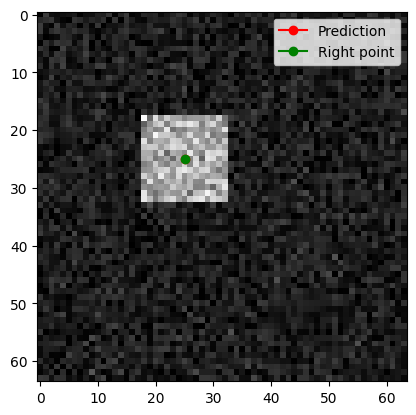

In [201]:
img, coord = bws_test_data[100]

load_reg_model.eval()
with torch.no_grad():
    pred = load_reg_model(img.view(1, 64*64).to(device)).detach().cpu()

y_pred = torch.round(pred[0])[0].item()
x_pred = torch.round(pred[0])[1].item() 

print(f'Pred coord: {pred[0]}')
print(f'\033[31mPred round-coord:\033[0m {torch.round(pred[0])}')
print(f'\033[32mTrue coord:\033[0m {coord}')

plt.imshow(img[0].numpy(), cmap='gray')
plt.plot(x_pred, y_pred, marker='o', color='red', label='Prediction')
plt.plot(coord[1].item(), coord[0].item(), marker='o', color='green', label='Right point')
plt.legend()
plt.show()

**Случаи с неверным предсказанием точки**

In [202]:
load_reg_model.eval()
test_loader = DataLoader(bws_test_data, batch_size=len(bws_test_data))

# Получаем один батч со всем тестовым набором
with torch.no_grad():
    x, targets = next(iter(test_loader))
    
print(f"Входные данные: {x.shape}")
print(f"Целевые значения: {targets.shape}")

Входные данные: torch.Size([20000, 1, 64, 64])
Целевые значения: torch.Size([20000, 2])


In [204]:
# Делаем предсказания на всех тестовых данных
pred = load_reg_model(x.reshape(-1, 64*64).to(device)).detach().cpu()
    # x.reshape(-1, 64*64) - преобразуем изображения 64x64 в векторы 4096
    # .to(device) - отправляем на GPU если есть
    # .detach().cpu() - отцепляем от графа вычислений и возвращаем на CPU

# Находим примеры с НЕправильными предсказаниями
index = ~(torch.round(pred) == targets).all(dim=1)
    # torch.round(pred) == targets - сравнение округленных предсказаний с истинными значениями
    # .all(dim=1) - True если ВСЕ координаты совпали (и x и y)
    # ~ - инвертируем: теперь True там, где предсказание НЕправильное
    # index — это булев тензор


print(f"Из {len(bws_test_data)} \033[31mНЕправильно\033[0m предсказано {index.sum()}.", end='\n\n')

# Выбираем только ошибочные примеры
imgs_false_pred = x[index]           # изображения с ошибками - булева индексация
false_pred = pred[index]             # неправильные предсказания - булева индексация
rel_false_pred = targets[index]      # правильные значения (targets) -- булева индексация

Из 20000 НЕправильно предсказано 994.



Pred coord:    tensor([23.5670, 31.4940])
Pred round_coord: tensor([24., 31.])
True coord:    tensor([24., 32.])


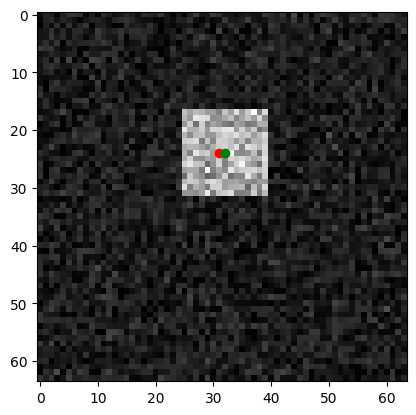

In [205]:
index_false_pred = 22
false_coords = false_pred[index_false_pred]
rel_coords = rel_false_pred[index_false_pred]

print(f'Pred coord:    {false_coords}')
print(f'\033[31mPred round_coord:\033[0m {torch.round(false_coords)}')
print(f'\033[32mTrue coord:\033[0m    {rel_coords}')

x_pred = torch.round(false_coords)[1].item()
y_pred = torch.round(false_coords)[0].item()

plt.imshow(imgs_false_pred[index_false_pred][0].numpy(), cmap='gray')
plt.plot(x_pred, y_pred, marker='o', color='red')
plt.plot(rel_coords[1].item(), rel_coords[0].item(), marker='o', color='green')
plt.show()